<a href="https://colab.research.google.com/github/manoelpajr/projeto_data_science/blob/master/Project_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Buenos Aires

O [airbnb](https://www.airbnb.com.br/) já é considerado a **maior empresa hoteleira da atualidade**. O detalhe é que ele **não possui nenhum hotel**.

Conectando pessoas que querem viajar (e se hospedar), com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

Neste notebook, iremos analisar os dados referentes à cidade de **Buenos Aires**, e ver quais insights podem ser extráidos a partir de dados brutos.

A cidade de **Buenos Aires** é a capital da Argentina. Possui, aproximadamente, 3 milhões de habitantes sendo o grande centro econômico do país. Localizada numa região de clima temperado, com as estações do ano bem definidas. Além disso, possui um conjunto de atrações culturais que atrai pessoas do mundo inteiro.

Para dicas sobre alguns lugares para visitar na cidade você pode acessar o site [Melhores Destinos de Buenos Aires](https://www.melhoresdestinos.com.br/o-que-fazer-buenos-aires-dicas.html).

Agora vamos ao que interessa! 

## Obtenção dos dados

Todos os dados utilizados no projeto foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

*   listings.cvs - Informações e métricas resumidas para acomodações na cidade de Buenos Aires.

In [2]:
# importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-05-25/visualisations/listings.csv")

## **Análise Inicial dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados

**Dicionário de variáveis**

*   `id` - número de id gerado para identificar o imóvel
*   `name` - nome da propriedade anunciada
*   `host_id` - número de id do proprietário (anfitrião) da propriedade
*   `host_name` - Nome do anfitrião
*   `neighbourhood_group` - está coluna não contém nenhum valor válido
*   `neighbourhood` - nome do bairro
*   `latitude` - coordenada da latitude da propriedade
*   `longitude` - coordeanda da longitude da propriedade
*   `room_type` - informa o tipo de acomodação que é oferecido
*   `price` - preço para alugar o imóvel
*   `minimim_nights` - quantidade mínima de noites para reservar
*   `number_of_reviews` - número de reviews que a propriedade possui
*   `last_review` - data do último review
*   `reviews_per_month` - quantidade de reviews por mês
*   `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
*   `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as cinco primeiras linhas


In [4]:
# mostrar as cinco primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,4090,2,26,2019-11-28,0.27,1,271
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1637,1,20,2017-12-11,0.16,1,365
2,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,3072,1,1,2018-12-18,0.06,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,3072,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,3072,1,66,2019-11-27,1.84,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Na sequência do nosso projeto identificaremos a quantidade de entradas que o nosso conjunto de dados possui e veremos os tipos de cada coluna.

Este *dataset* que baixamos é a versão resumida do Airbnb. Ele possui:

*   Entradas: 23828
*   Variáveis: 16


In [5]:
# identificar o volume de dado do DatFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

#verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 23828
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausente no *dataset*?**

É de máxima importância verificar os valores ausentes em um *dataset*, pois isso interfere diretamente na qualidade dos dados e em futuras analises. Ao analisarmos os dados resumidos de Buenos Aires sobre dados nulos chegamos as seguintes informações:

*   A coluna `neighbourhood_group`possui todos os valores nulos
*   As colunas `reviews_per_month` e `last_review` possuem mais de 1\4 de valores nulos
*   As colunas `host_name` e `name` possuem menos de 1% de valores nulos
*   Todas as outras colunas não possuem valores nulos


In [6]:
#ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.277657
last_review                       0.277657
name                              0.000420
host_name                         0.000168
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para observar a distribuição das variáveis plotaremos o histograma de cada um dos dados presentes no *dataset*.

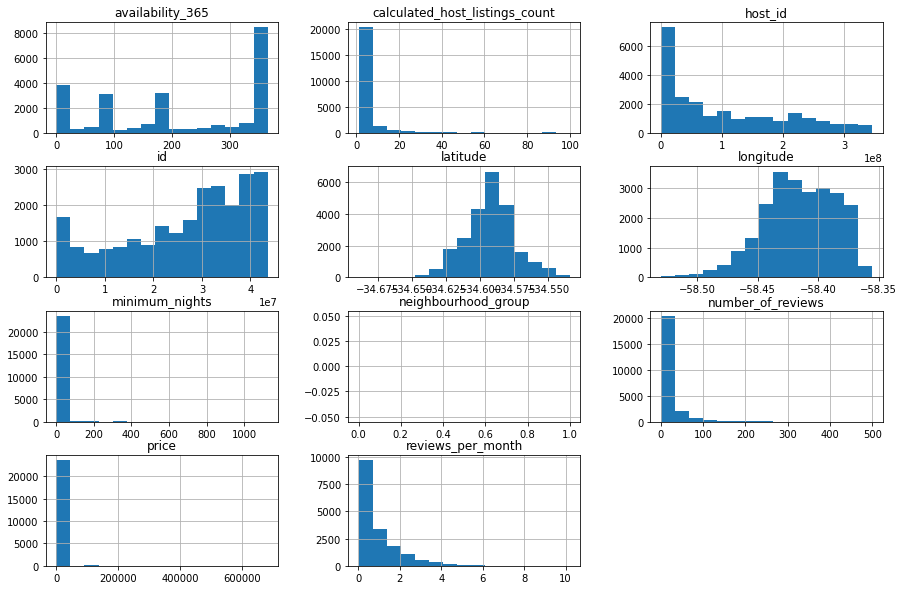

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4, Há outliers presentes?**


Pela distribuição dos histogramas, é possível verificar indícios da presença de *outliers*. 

Se observarmos, por exemplo, as varáveis `price`, `minimum_nights` e `calculated_host_listing_count`, veremos que os valores não seguem uma distrubuição e acabam distorcendo a representação gráfica. 

Para podermos confirmar, há duas maneiras rápidas que auxiliam a detecção desses valores. São elas:

*   Resumos estatístico por meio do método `describe()`
*   Plotar `bloxplots` para a variável

In [8]:
# ver o resumo estatístico das variáveis
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23828.000000,23828.000000,23828.000000,17212.000000,23828.000000,23828.000000
mean,4154.259065,6.303676,16.156455,0.952863,6.323737,209.460173
std,17037.797459,25.923081,32.136814,1.067921,14.751120,139.348356
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1367.000000,1.000000,0.000000,0.210000,1.000000,89.000000
50%,2182.000000,3.000000,4.000000,0.560000,1.000000,180.000000
75%,3413.000000,5.000000,17.000000,1.320000,4.000000,364.000000
max,682597.000000,1125.000000,500.000000,10.210000,100.000000,365.000000


Olhando o resumo estatístico, podemos confirmar algumas hipóteses como:

*   A variável `price` possui 75% dos valores abaixo de 3413, porém o seu valor máximo chega a 6825597.
*   A quantida máxima de noites (´minimum_nights`) está acim de 365 dias no ano, por sua vez, 75% dos vaores estão abaixo de 5
*   A quantidade de de imóveis do mesmo anfitrião (`calculated_host_listings_count`) possui 75% dos seus valores abaixo de 4, entretanto, possui um valor máximo de 100.
*   A variável ´number_of_reviews`possui mvalor máximo de 500, mas 3/4 estão dos valores estão abaixo de 17
*   A quantidade de vezes que os imóveis são revisados por mês possui 75% dos valors abaixo de 1,32, porém o máximo encontra-se em 10,21


#### Boxplot para `minimum_nights`

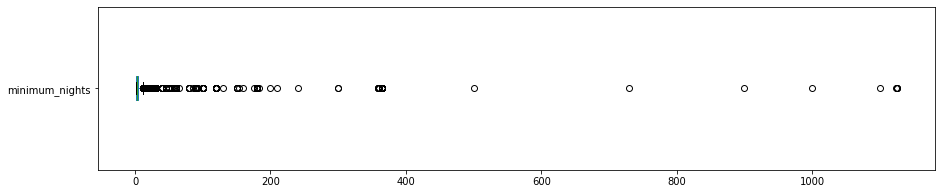

minimum_nights: valores acima de 30:
362 entradas
1.5192%


In [9]:
# minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 30 dias para minimum_nights

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para `price`

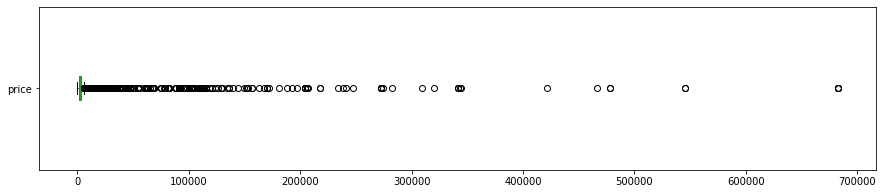

price: valores acima de 6000:
2334 entradas
9.7952%


In [10]:
# price

df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 6000 para price

print("price: valores acima de 6000:")
print("{} entradas".format(len(df[df.price > 6000])))
print("{:.4f}%".format((len(df[df.price > 6000]) / df.shape[0])*100))

#### Boxplot para `number_of_reviews`



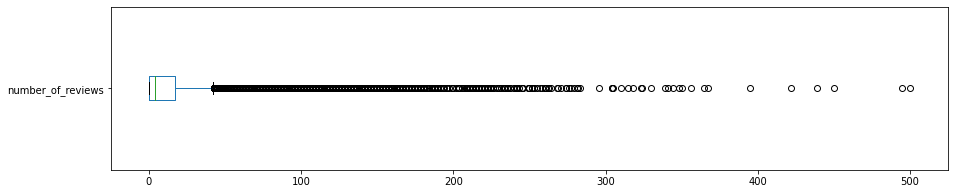

number_of_reviews: valores acima de 40:
2754 entradas
11.56%


In [11]:
# number_of_reviews

df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantida de valores acima de 40 para number_of_reviews

print("number_of_reviews: valores acima de 40:")
print("{} entradas".format(len(df[df.number_of_reviews > 40])))
print("{:.4}%".format((len(df[df.number_of_reviews > 40])/ df.shape[0])*100))

#### Boxplot para `reviews_per_month`


reviews_per_month: valores acima de 3:
966 entradas
4.054%


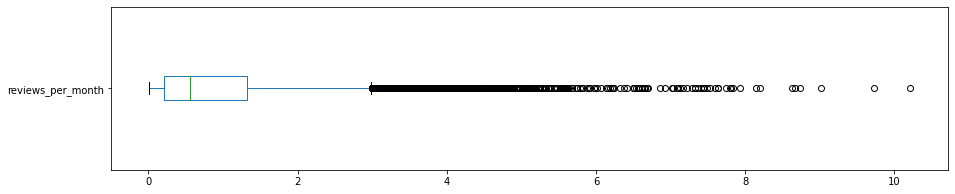

In [12]:
# reviews_per_month

df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))
plt.show

#ver quantidade de valores acima de 3 para reviews_per_month

print("reviews_per_month: valores acima de 3:")
print("{} entradas".format(len(df[df.reviews_per_month > 3])))
print("{:.4}%".format((len(df[df.reviews_per_month > 3]) / df.shape[0])*100))

#### Boxplot para `calculated_host_listings_count`

calculated_host_listings_count: valores acima de 12:
2572 entradas
10.79%


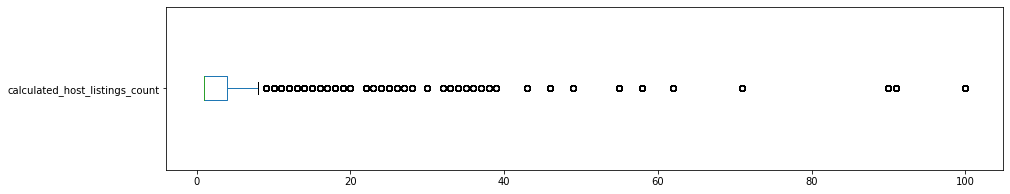

In [13]:
# calculated_host_listings_count

df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3))
plt.show

#ver quantidade de valores acima de 12 para calculated_host_listings_count

print("calculated_host_listings_count: valores acima de 12:")
print("{} entradas".format(len(df[df.calculated_host_listings_count > 12])))
print("{:.4}%".format((len(df[df.calculated_host_listings_count > 12]) / df.shape[0])* 100))


#### Histogramas sem *outliers*

Já que identificamos *outliers* em diversas variáveis do nosso *DataFrame*, vamos agora limpar e plotar novamente o histograma.

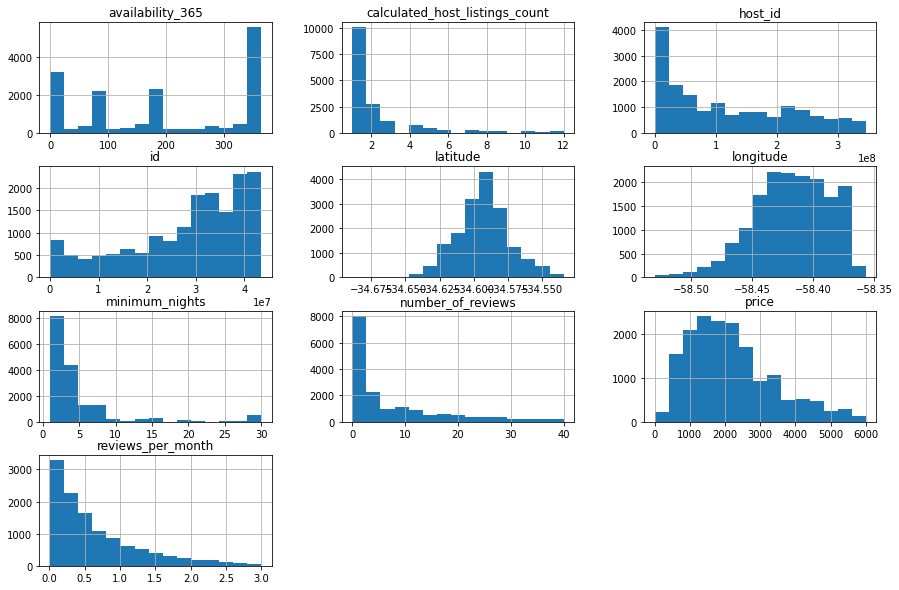

In [33]:
# remover os outliers em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 6000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 40].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 3].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 12].index, axis=0, inplace=True)

#remover neighbourhood_group, pois está vázio

df_clean.drop('neighbourhood_group', axis=1, inplace=True)


#plotar o histograma com as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis?**

Correlação significa que existem uma relação entre duas coisas, nesse caso, entre duas variáveis do nosso *dataset*. 

Essa relação pode ser medida e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entreas as variáveis de interesse, iremos realizar dois procedimentos. São eles;

*   Criar uma matriz de correlação
*   Gerar um *heatmap* a partir dessa matriz de correlação, usando a biblioteca `seaborn`

In [16]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.024845,0.065786,0.034534,0.136421,0.149041
minimum_nights,-0.024845,1.000000,-0.083931,-0.127175,0.112734,0.033510
number_of_reviews,0.065786,-0.083931,1.000000,0.678484,-0.051138,0.074897
reviews_per_month,0.034534,-0.127175,0.678484,1.000000,-0.075597,-0.017380
calculated_host_listings_count,0.136421,0.112734,-0.051138,-0.075597,1.000000,0.091743
availability_365,0.149041,0.033510,0.074897,-0.017380,0.091743,1.000000


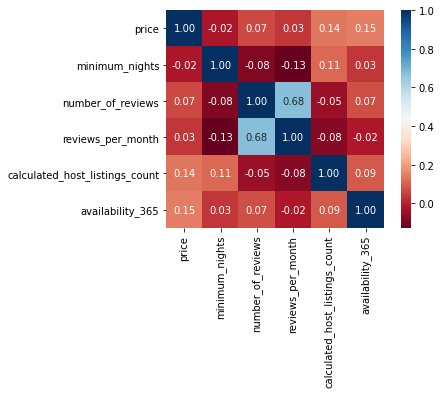

In [19]:
#Heatmap

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb de Buenos Aires?**

A coluna variável `room_type`indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções como, por exemplo, casas ou apartamentos inteiros, quartos de residências, quartos de hóteis, ou até mesmo quartos compartilhados.

Vamos contar a quantidade de ocorrência de cada tipo de aluguel, usando o método `value_counts()`.


In [20]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    16144
Private room        4318
Shared room          521
Hotel room           188
Name: room_type, dtype: int64

In [21]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.762553
Private room       0.203958
Shared room        0.024609
Hotel room         0.008880
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Buenos Aires?**

Uma maneira de se verificar uma variável em função da outra é usando o método `groupby()`. No caso, queremor com os bairros (*neighbourhoods*) a partir do preço de locação.

In [23]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Villa Soldati    3859.666667
Puerto Madero    3805.038095
Palermo          2522.231672
Retiro           2446.035714
Versalles        2397.461538
Recoleta         2390.637316
Nuñez            2201.186111
Belgrano         2165.984270
San Nicolas      2127.628233
San Telmo        2113.114504
Name: price, dtype: float64

Acima, podemos perceber que os bairros Villa Soldati, Puerto Madero, Palermo, Retiro e Versalles possuem os valores mais elevados para locação na cidade de Buenos Aires.

Contudo, é interessante observarmos se essas localidades possuem amostras representativas, ou  não representativas para o conjunto dos dados disponíveis. 

Vamos verificar então a quantidade de amostras disponíveis para os dois bairros mais caros da cidade.

In [28]:
#ver quantidade de imóveis disponíveis na Villa Soldati e Puerto Madero

print(df_clean[df_clean.neighbourhood == "Villa Soldati"].shape)
print(df_clean[df_clean.neighbourhood == "Puerto Madero"].shape)

# ver as três entradas de Villa Soldati
df_clean[df_clean.neighbourhood == "Villa Soldati"]

(3, 12)
(105, 12)


,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14022,Departamento amplio y cómodo,226116702,Aneth,Villa Soldati,Entire home/apt,2731,1,0,NaN,NaN,2,179
15702,Muy buen hambiente..tranquilidad y espacio,260348454,Nilsa,Villa Soldati,Private room,4032,1,0,NaN,NaN,1,364
16014,Departamento capital federal 4 ambientes grandes,262448759,Fer,Villa Soldati,Private room,4816,1,0,NaN,NaN,1,365


In [29]:
# ver as entradas para o bairro de Puerto Madero

df_clean[df_clean.neighbourhood == "Puerto Madero"]

,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
525,Studio @ Puerto Madero Buenos Aires,719967,Nicolas,Puerto Madero,Entire home/apt,3759,2,21,2019-01-27,0.27,1,224
1301,"Apartment puerto madero, buenos aires city",908033,Heidi,Puerto Madero,Entire home/apt,4779,2,13,2020-03-18,0.18,1,180
1789,Beautiful apartment - Puerto Madero,3190038,Fernando,Puerto Madero,Entire home/apt,5120,4,29,2020-03-21,0.42,1,89
1830,Nice apartment at Faena Los Molinos,17848912,Andres,Puerto Madero,Entire home/apt,4431,30,28,2020-02-09,0.51,1,98
2108,Apart 5★ Amoblado Puerto Madero-Rio V,23825436,Horacio,Puerto Madero,Entire home/apt,5461,3,1,2015-09-10,0.02,2,364
...,...,...,...,...,...,...,...,...,...,...,...,...
23492,1 Bedroom w private Garage Puerto Madero,41218116,Patricia,Puerto Madero,Entire home/apt,1707,30,0,NaN,NaN,3,180
23546,"Ideal 2 bedroom apartment + parking, Puerto Ma...",230054892,Alicia Dolores,Puerto Madero,Entire home/apt,5120,3,0,NaN,NaN,2,363
23579,edificio sls lux puerto madero buenos Aires Arg,119355873,Gaston,Puerto Madero,Entire home/apt,0,1,0,NaN,NaN,1,365
23585,Departamento en Puerto Madero,343381757,Danisa,Puerto Madero,Entire home/apt,5461,3,0,NaN,NaN,1,363


### **Q7. Qual a área de maior concentração de imóveis em Buenos Aires?**

A partir do momento em que temos dados de latitude e longitude pode-se querer observar as áreas com maiores e menores concentrações de imóveis disponíveis na cidade de Buenos Airtes.

Para isso, considera-se `x = longitude`e `y = latitude`.

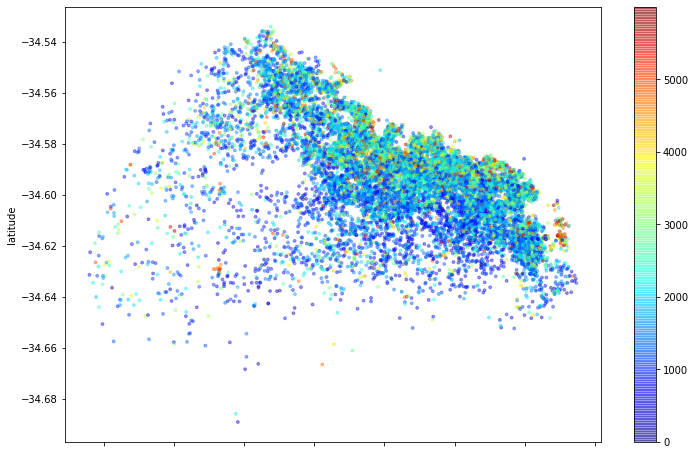

In [34]:
# plotar os imóveis a partir das suas coordenadas geográficas (latitude e longitude)

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Conclusão**

Foi feita apenas uma análise superficial na base de dados do Airbnb para a cidade de Buenos Aires - lembrando que esses dados são resumidos. Contudo, percebemos que existem *outliers* em algumas das variáveis e, caso isso não seja tratado da forma correta pode gerar resultados inconclusivos.

Também notamos que alguns bairros possuem poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de aguns atributos.

Além disso, a partir da localizçaão dos imóveis por meio dos seus pares de coordenadas geográficas, uma concentração muito alta dos imóveis nas regiões mais ao norte da cidade. Isso pode ser resultado de vários fatores como localização próxima e a restaurantes, museus, teatros, dentre outras coisas. Porém, para chegarmos a uma informação mais precisa sobre isso precisaríamos dos dados relacionados à localização desses outros lugares para fazermos uma correlação entre eles.

Contudo, para um análise exploratória mais acurada, seria necessários a utilização dos dados completos para a cidade de Buenos Aires, que contém mais de 100 atributos(variáveis) disponível, que não foi o objetivo dessa análise exploratória inicial.